In [1]:
# %% codecell
import numpy as np
import Plot as plot
import math
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
import time
import datetime
import pickle
import os
import scipy.spatial
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib as plt
import logging
from scipy import signal
import learningAlgs as classImportLA
import dataManipulation as dataMan
from itertools import permutations
import importlib
from datetime import timedelta
from multiprocessing import Pool
import multiprocessing
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans
import timeIntervalPlotter as intervalPlotter
import pysal
import warnings
import lumping_traditional as oldLumping
import boundaryFull_SS_WeightedLumping as WLumping
from importlib import reload
from scipy.stats import rayleigh
import dataManipulation as dataMan
import matplotlib.pyplot as plt
import processData as processData
import tensorflow as tf
warnings.filterwarnings('always')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# <codecell>

/home/sepehr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/sepehr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/sepehr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/sepehr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (

In [2]:
#*******************************************************************************
# %%codecell
reload(classImportLA)
reload(processData)
dataFrame = processData.processingData()
#address is: /home/netlab/Desktop/thesis/data/1node1-3-5/
#/home/netlab/Desktop/thesis/data/500f80271400/
#/home/sepehr/thesis/data/500f80271400/
data = dataFrame.copy() #copying the dataFrame to have a copy of not edited data

print("hello")
# <codecell>

#*******************************************************************************
# %% codecell
data = processData.dataFrameManipulation(data)

numberOfStates = 255
cuTrans_10minutes = processData.markovianTransitionMatrixDegree1(data, numberOfStates, "CU")
normalizedCuTrans_10minutes = processData.normalizingTransMatrix(cuTrans_10minutes)

# <codecell>
#*******************************************************************************


the address of the collected data files (not alligned files or CSV files): /home/sepehr/thesis/data/500f80271400/
['500f80271400.txt']
here
500f80271400.txt is in csvChecker

we have the csv file: pulling out data

   col1                time  CU
0     0 2018-11-13 02:01:32  45
1     1 2018-11-13 02:01:38  45
2     2 2018-11-13 02:01:44  51
3     3 2018-11-13 02:01:50  53
4     4 2018-11-13 02:01:56  45
now we have the processed data from pandas
hello
please enter how long would be the chunk minutes? 5
removing weekends from the data


In [311]:
# x = data.loc[data["time"].years == 2018]
# plt.plot(x["time"], x["CU"])
plt.figure(figsize=(15,10))
# plt.plot(data[data["time"] > '2019-05-01']["time"], data[data["time"] > '2019-05-01']["CU"])
# data[data["time"] < '2019-01-01']
# data["CU"].plot()
dataPlot = [go.Scatter( x = data[data["time"] < '2018-11-17']["time"], y = data[data["time"] < '2018-11-17']["CU"] )]
fig = go.Figure(data=dataPlot)
# plotName = address + str(fileName) + ".html"
offline.plot(fig, filename = "aaaaaa.html", image = "svg")

'aaaaaa.html'

<Figure size 1080x720 with 0 Axes>

In [4]:
steadyState_10minutes = np.zeros(shape=(normalizedCuTrans_10minutes.shape[0],
                                     normalizedCuTrans_10minutes.shape[1]))

for i in range(normalizedCuTrans_10minutes.shape[0]):
    steadyState_10minutes[i] = abs(pysal.spatial_dynamics.ergodic.
                                steady_state(normalizedCuTrans_10minutes[i]))

correlationScore_numpy = np.zeros(shape = (normalizedCuTrans_10minutes.shape[0],
                                     normalizedCuTrans_10minutes.shape[0]))

listOfNeighbours = [0 for i in range(normalizedCuTrans_10minutes.shape[0])]


for i in range(normalizedCuTrans_10minutes.shape[0]):
    for j in range(normalizedCuTrans_10minutes.shape[0]):
        input1 = (steadyState_10minutes[i] - np.mean(
            steadyState_10minutes[i])) / (np.std(steadyState_10minutes[i]) * len(
                steadyState_10minutes[i]))

        input2 = (steadyState_10minutes[j] - np.mean(steadyState_10minutes[j])
                  ) / (np.std(steadyState_10minutes[j]))
        correlation = signal.correlate(input1, input2, mode="full")
        correlationScore = correlation[int(np.floor(len(correlation)/2))]

        correlationScore_numpy[i][j] = correlationScore


In [42]:
superscript_map = {
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶",
    "7": "⁷", "8": "⁸", "9": "⁹", "a": "ᵃ", "b": "ᵇ", "c": "ᶜ", "d": "ᵈ",
    "e": "ᵉ", "f": "ᶠ", "g": "ᵍ", "h": "ʰ", "i": "ᶦ", "j": "ʲ", "k": "ᵏ",
    "l": "ˡ", "m": "ᵐ", "n": "ⁿ", "o": "ᵒ", "p": "ᵖ", "q": "۹", "r": "ʳ",
    "s": "ˢ", "t": "ᵗ", "u": "ᵘ", "v": "ᵛ", "w": "ʷ", "x": "ˣ", "y": "ʸ",
    "z": "ᶻ", "A": "ᴬ", "B": "ᴮ", "C": "ᶜ", "D": "ᴰ", "E": "ᴱ", "F": "ᶠ",
    "G": "ᴳ", "H": "ᴴ", "I": "ᴵ", "J": "ᴶ", "K": "ᴷ", "L": "ᴸ", "M": "ᴹ",
    "N": "ᴺ", "O": "ᴼ", "P": "ᴾ", "Q": "Q", "R": "ᴿ", "S": "ˢ", "T": "ᵀ",
    "U": "ᵁ", "V": "ⱽ", "W": "ᵂ", "X": "ˣ", "Y": "ʸ", "Z": "ᶻ", "+": "⁺",
    "-": "⁻", "=": "⁼", "(": "⁽", ")": "⁾"}

subscript_map = {
    "0": "₀", "1": "₁", "2": "₂", "3": "₃", "4": "₄", "5": "₅", "6": "₆",
    "7": "₇", "8": "₈", "9": "₉", "a": "ₐ", "b": "♭", "c": "꜀", "d": "ᑯ",
    "e": "ₑ", "f": "բ", "g": "₉", "h": "ₕ", "i": "ᵢ", "j": "ⱼ", "k": "ₖ",
    "l": "ₗ", "m": "ₘ", "n": "ₙ", "o": "ₒ", "p": "ₚ", "q": "૧", "r": "ᵣ",
    "s": "ₛ", "t": "ₜ", "u": "ᵤ", "v": "ᵥ", "w": "w", "x": "ₓ", "y": "ᵧ",
    "z": "₂", "A": "ₐ", "B": "₈", "C": "C", "D": "D", "E": "ₑ", "F": "բ",
    "G": "G", "H": "ₕ", "I": "ᵢ", "J": "ⱼ", "K": "ₖ", "L": "ₗ", "M": "ₘ",
    "N": "ₙ", "O": "ₒ", "P": "ₚ", "Q": "Q", "R": "ᵣ", "S": "ₛ", "T": "ₜ",
    "U": "ᵤ", "V": "ᵥ", "W": "w", "X": "ₓ", "Y": "ᵧ", "Z": "Z", "+": "₊",
    "-": "₋", "=": "₌", "(": "₍", ")": "₎"}

print("a" + subscript_map["1"] + superscript_map["2"])

a₁²


In [108]:
from sympy import *
from sympy.abc import a, b, n
import pprint

# q = symbols("_")
# print(q)
i = 2
a, x_1 = symbols('a, x_'+str(i))
e = pretty((x_1)**a)
l = str(e + str(q[0]))
print(l)
# expr = (a q b)**n
# print(expr)
# s = pprint.pformat(expr)
# l = pretty(expr) # default
# print(l)
# l = pp(expr, use_unicode=True)
# print(latex(expr))

  a
x₂ 1.0000000000000002


In [71]:
print(str(l))

     n
(a⋅b) 


In [105]:
q = correlationScore_numpy[0]

In [134]:
a = correlationScore_numpy[0].copy()

In [146]:
print(a)
correlationScore_numpy[0] = np.around(correlationScore_numpy[0],4)
print(a)

[1.     0.9949 0.9944 0.9938 0.993  0.9904 0.9915 0.993  0.9926 0.9899
 0.9859 0.9924 0.9901 0.9846 0.992  0.9828 0.9869 0.9911 0.9932 0.9866
 0.9899 0.9881 0.9864 0.9918 0.9966 0.9938 0.9918 0.9898 0.9906 0.9901
 0.9874 0.9882 0.9907 0.9936 0.9887 0.9892 0.9886 0.9737 0.9929 0.9904
 0.9917 0.9891 0.9912 0.9923 0.9915 0.9887 0.9907 0.9915 0.9887 0.9926
 0.9932 0.9941 0.994  0.9887 0.9896 0.995  0.994  0.9898 0.9902 0.9887
 0.9887 0.9856 0.9836 0.9884 0.9929 0.9868 0.9882 0.9852 0.9827 0.9861
 0.9861 0.9878 0.987  0.9846 0.9851 0.9829 0.9752 0.9777 0.9821 0.9798
 0.9743 0.9719 0.9688 0.9778 0.9653 0.9702 0.9683 0.9601 0.9409 0.9281
 0.9272 0.9061 0.8915 0.8559 0.8322 0.8588 0.8632 0.8572 0.8789 0.8549
 0.8469 0.8334 0.8465 0.8458 0.8068 0.8057 0.7788 0.7834 0.8236 0.8313
 0.8038 0.8051 0.7879 0.8223 0.7986 0.8009 0.7691 0.7715 0.7645 0.7386
 0.7348 0.7469 0.7088 0.7228 0.7137 0.6993 0.6883 0.6603 0.6488 0.6427
 0.6296 0.6488 0.6171 0.6032 0.6068 0.6306 0.587  0.5968 0.5932 0.5994
 0.593

In [152]:
"a\'"

"a'"

In [7]:
import pandas as pd
dataF = pd.DataFrame()
j = 0
for i in range(0, len(correlationScore_numpy[0]), 12):
    if i + 12 <= len(correlationScore_numpy[0]):
        if j < 10:
            dataF[str(0) + str(j)+":00"] = correlationScore_numpy[0][i:i+12]
        else:
            dataF[str(j)+":00"] = correlationScore_numpy[0][i:i+12]
        j += 1

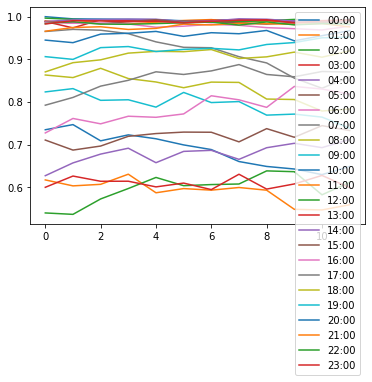

In [8]:
plt.plot(dataF)
plt.legend(dataF.columns)
plt.show()

In [9]:
new_dataF = dataF.T.rename(columns={0: ":00-:05", 1: ":05-:10", 2: ":10-:15", 3: ":15-:20", 4: ":20-:25", 5: ":25-:30", 6: ":30-:35", 7: ":35-:40", 8: ":40-:45", 9: ":45-:50", 10: ":50-:55", 11: ":55-:00"})
new_dataF

,:00-:05,:05-:10,:10-:15,:15-:20,:20-:25,:25-:30,:30-:35,:35-:40,:40-:45,:45-:50,:50-:55,:55-:00
00:00,1.000000,0.994867,0.994372,0.993849,0.993004,0.990384,0.991470,0.992973,0.992627,0.989930,0.985944,0.992404
01:00,0.990062,0.984571,0.992047,0.982798,0.986925,0.991104,0.993207,0.986621,0.989886,0.988113,0.986412,0.991774
02:00,0.996592,0.993751,0.991844,0.989819,0.990642,0.990083,0.987378,0.988224,0.990673,0.993580,0.988707,0.989155
03:00,0.988590,0.973745,0.992920,0.990430,0.991678,0.989056,0.991229,0.992279,0.991468,0.988672,0.990736,0.991541
04:00,0.988673,0.992578,0.993220,0.994129,0.993982,0.988651,0.989588,0.995034,0.994037,0.989788,0.990232,0.988745
05:00,0.988669,0.985595,0.983645,0.988405,0.992920,0.986753,0.988193,0.985176,0.982679,0.986106,0.986096,0.987751
06:00,0.987014,0.984562,0.985122,0.982882,0.975222,0.977694,0.982150,0.979806,0.974308,0.971862,0.968810,0.977838
07:00,0.965308,0.970231,0.968272,0.960137,0.940941,0.928148,0.927162,0.906127,0.891536,0.855911,0.832168,0.858811
08:00,0.863214,0.857179,0.878933,0.854901,0.846858,0.833383,0.846548,0.845843,0.806836,0.805742,0.778793,0.783442
09:00,0.823562,0.831302,0.803836,0.805135,0.787898,0.822330,0.798591,0.800906,0.769109,0.771511,0.764464,0.738561


In [18]:
new_dataF.T.iloc[0]

:00-:05    1.000000
:05-:10    0.994867
:10-:15    0.994372
:15-:20    0.993849
:20-:25    0.993004
:25-:30    0.990384
:30-:35    0.991470
:35-:40    0.992973
:40-:45    0.992627
:45-:50    0.989930
:50-:55    0.985944
:55-:00    0.992404
Name: 00:00, dtype: float64

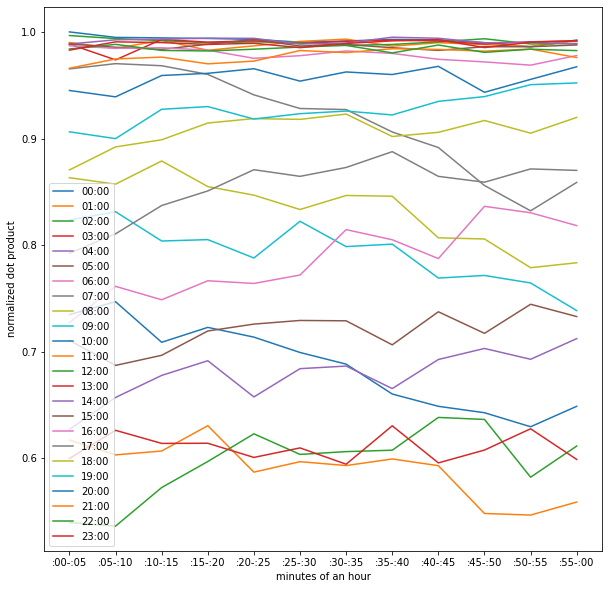

In [15]:
plt.figure(figsize=(10,10))
plt.plot(new_dataF.T)
plt.legend(new_dataF.T.columns)
plt.ylabel('normalized dot product')
plt.xlabel('minutes of an hour')
# print(plt)
plt.savefig("dot_product_hourly.svg", format="svg")
plt.savefig("dot_product_hourly.pdf", format="pdf")
plt.show()

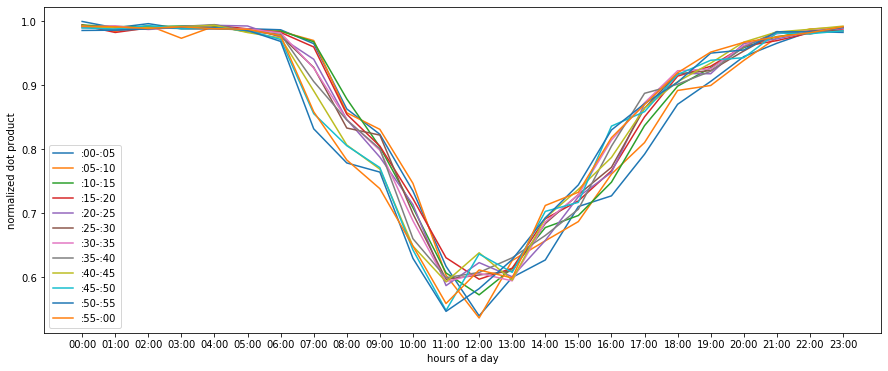

In [42]:
plt.figure(figsize=(15,6))
plt.plot(new_dataF)
plt.legend(new_dataF.columns)
plt.ylabel('normalized dot product')
plt.xlabel('hours of a day')
# print(plt)
plt.savefig("dot_product_daily.svg", format="svg")
plt.savefig("dot_product_daily.pdf", format="pdf")
plt.show()

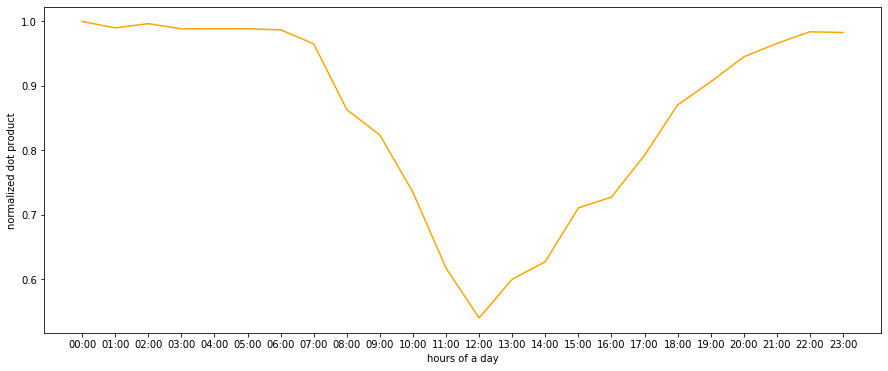

In [46]:
plt.figure(figsize=(15,6))
plt.plot(new_dataF.T.iloc[0], 'orange')
# plt.legend(new_dataF.T.iloc[0].columns)
plt.ylabel('normalized dot product')
plt.xlabel('hours of a day')
# print(plt)
# plt.savefig("pi0_with_rest.emf", format="emf")
plt.savefig("pi1_with_rest.svg", format="svg")
plt.savefig("pi1_with_rest.pdf", format="pdf")
plt.show()

In [256]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [214]:
# iterables = [['aaaa'], ["00\''-05\''", "05\''-10\''", "10\''-15\''", "15\''-20\''", "20\''-25\''", "25\''-30\''", "30\''-35\''", "35\''-40\''", "40\''-45\''", "45\''-50\''", "50\''-55\''", "55\''-00\''",]]
# iterables = [['aaaa'], ["0\'", "1\'", "2\'", "3\'", "4\'", "5\'", "6\'", "7\'", "8\'", "9\'","10\'", "11\'", "12\'", "13\'", "14\'", "15\'", "16\'", "17\'", "18\'", "19\'", "20\'", "21\'", "22\'", "23\'"]]

# pd.DataFrame(new_dataF, columns=iterables)
# pd.MultiIndex.from_product(iterables, names=["00\''-05\''", "05\''-10\''", "10\''-15\''", "15\''-20\''", "20\''-25\''", "25\''-30\''", "30\''-35\''", "35\''-40\''", "40\''-45\''", "45\''-50\''", "50\''-55\''", "55\''-00\''"])
# index = pd.MultiIndex.from_product(iterables)
# s = pd.Series(new_dataF, index=index)
# s
# new_dataF.columns = ["id"]
# j = pd.MultiIndex.from_frame(new_dataF, names=['state', 'state', 'state', 'state', 'state', 'state', 'state', 'state', 'state', 'state', 'state', 'state',])
j = pd.concat([new_dataF], keys=['Foo'])
j = pd.concat([j.T], keys=['Foo'])

In [215]:
j

Foo                                                          \
                   0'      1'      2'      3'      4'      5'      6'      7'   
Foo 00''-05''  1.0000  0.9901  0.9966  0.9886  0.9887  0.9887  0.9870  0.9653   
    05''-10''  0.9949  0.9846  0.9938  0.9737  0.9926  0.9856  0.9846  0.9702   
    10''-15''  0.9944  0.9920  0.9918  0.9929  0.9932  0.9836  0.9851  0.9683   
    15''-20''  0.9938  0.9828  0.9898  0.9904  0.9941  0.9884  0.9829  0.9601   
    20''-25''  0.9930  0.9869  0.9906  0.9917  0.9940  0.9929  0.9752  0.9409   
    25''-30''  0.9904  0.9911  0.9901  0.9891  0.9887  0.9868  0.9777  0.9281   
    30''-35''  0.9915  0.9932  0.9874  0.9912  0.9896  0.9882  0.9821  0.9272   
    35''-40''  0.9930  0.9866  0.9882  0.9923  0.9950  0.9852  0.9798  0.9061   
    40''-45''  0.9926  0.9899  0.9907  0.9915  0.9940  0.9827  0.9743  0.8915   
    45''-50''  0.9899  0.9881  0.9936  0.9887  0.9898  0.9861  0.9719  0.8559   
    50''-55''  0.9859  0.9864  0.9887  0.9907  0.9902  0.9861  0.9688  0.8322   
    55''-00''  0.9924  0.9918  0.9892  0.9915  0.9887  0.9878  0.9778  0.8588   

                               ...                                          \
                   8'      9'  ...     14'     15'     16'     17'     18'   
Foo 00''-05''  0.8632  0.8236  ...  0.6271  0.7106  0.7273  0.7924  0.8705   
    05''-10''  0.8572  0.8313  ...  0.6571  0.6871  0.7613  0.8106  0.8921   
    10''-15''  0.8789  0.8038  ...  0.6777  0.6966  0.7487  0.8371  0.8988   
    15''-20''  0.8549  0.8051  ...  0.6915  0.7194  0.7665  0.8508  0.9145   
    20''-25''  0.8469  0.7879  ...  0.6576  0.7259  0.7640  0.8707  0.9187   
    25''-30''  0.8334  0.8223  ...  0.6841  0.7293  0.7719  0.8645  0.9180   
    30''-35''  0.8465  0.7986  ...  0.6865  0.7290  0.8145  0.8728  0.9229   
    35''-40''  0.8458  0.8009  ...  0.6654  0.7064  0.8050  0.8877  0.9019   
    40''-45''  0.8068  0.7691  ...  0.6927  0.7374  0.7874  0.8645  0.9058   
    45''-50''  0.8057  0.7715  ...  0.7030  0.7172  0.8364  0.8590  0.9169   
    50''-55''  0.7788  0.7645  ...  0.6929  0.7445  0.8303  0.8715  0.9050   
    55''-00''  0.7834  0.7386  ...  0.7123  0.7330  0.8183  0.8701  0.9198   

                                                       
                  19'     20'     21'     22'     23'  
Foo 00''-05''  0.9063  0.9451  0.9659  0.9840  0.9829  
    05''-10''  0.8999  0.9391  0.9746  0.9883  0.9907  
    10''-15''  0.9274  0.9591  0.9764  0.9826  0.9900  
    15''-20''  0.9300  0.9611  0.9701  0.9821  0.9883  
    20''-25''  0.9182  0.9654  0.9726  0.9838  0.9893  
    25''-30''  0.9233  0.9538  0.9825  0.9858  0.9852  
    30''-35''  0.9257  0.9624  0.9806  0.9873  0.9892  
    35''-40''  0.9221  0.9600  0.9842  0.9803  0.9916  
    40''-45''  0.9348  0.9677  0.9836  0.9877  0.9927  
    45''-50''  0.9393  0.9434  0.9819  0.9808  0.9853  
    50''-55''  0.9505  0.9555  0.9839  0.9838  0.9904  
    55''-00''  0.9521  0.9673  0.9759  0.9825  0.9917  

[12 rows x 24 columns]

In [216]:

import plotly.plotly as py
import plotly.figure_factory as ff
table = ff.create_table(j, index=True)
offline.plot(table, filename='jupyter-table1.html')

'jupyter-table1.html'

In [ ]:
plt.plot()

No handles with labels found to put in legend.


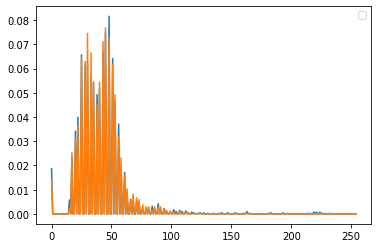

In [222]:
plt.plot(steadyState_10minutes[1])
plt.plot(steadyState_10minutes[0])
# plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
plt.legend(loc='best')
plt.show()

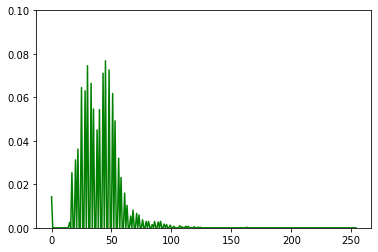

In [16]:
from matplotlib import pyplot
plt.plot(steadyState_10minutes[0], color = "green")
plt.ylim(0, 0.1)
pyplot.savefig("steadyState0.svg", format="svg")
pyplot.savefig("steadyState0.pdf", format="pdf")
plt.show()

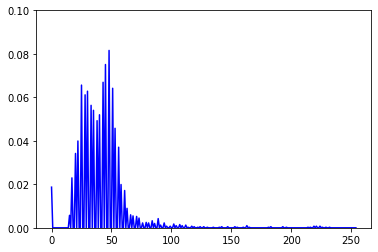

In [17]:
from matplotlib import pyplot
plt.plot(steadyState_10minutes[1], color = "blue")
plt.ylim(0, 0.1)
pyplot.savefig("steadyState1.svg", format="svg")
pyplot.savefig("steadyState1.pdf", format="pdf")
plt.show()

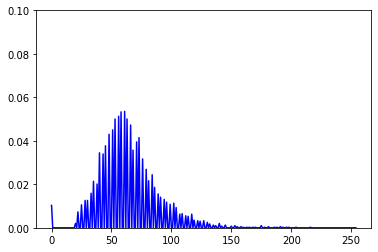

In [18]:
from matplotlib import pyplot
plt.plot(steadyState_10minutes[150], color = "blue")
plt.ylim(0, 0.1)
pyplot.savefig("steadyState150.svg", format="svg")
pyplot.savefig("steadyState150.pdf", format="pdf")
plt.show()

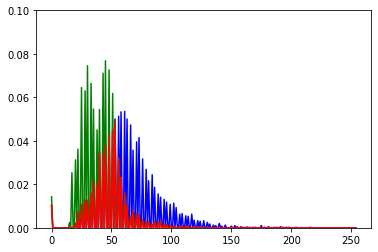

In [19]:
plt.plot(steadyState_10minutes[150], color = "blue")
plt.plot(steadyState_10minutes[0], color = "green")
plt.ylim(0, 0.1)
extra = np.min((steadyState_10minutes[150], steadyState_10minutes[0]), axis = 0)
plt.plot(extra, color = "red")
pyplot.savefig("steadyState_covered150-0.svg", format="svg")
pyplot.savefig("steadyState_covered150-0.pdf", format="pdf")
plt.show()

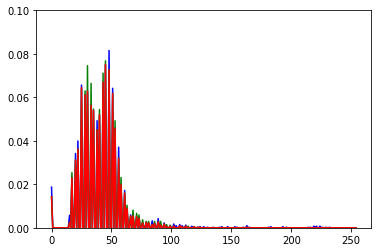

In [21]:
plt.plot(steadyState_10minutes[1], color = "blue")
plt.plot(steadyState_10minutes[0], color = "green")
plt.ylim(0, 0.1)
extra = np.min((steadyState_10minutes[1], steadyState_10minutes[0]), axis = 0)
plt.plot(extra, color = "red")
pyplot.savefig("steadyState_covered1-0.svg", format="svg")
pyplot.savefig("steadyState_covered1-0.pdf", format="pdf")
plt.show()

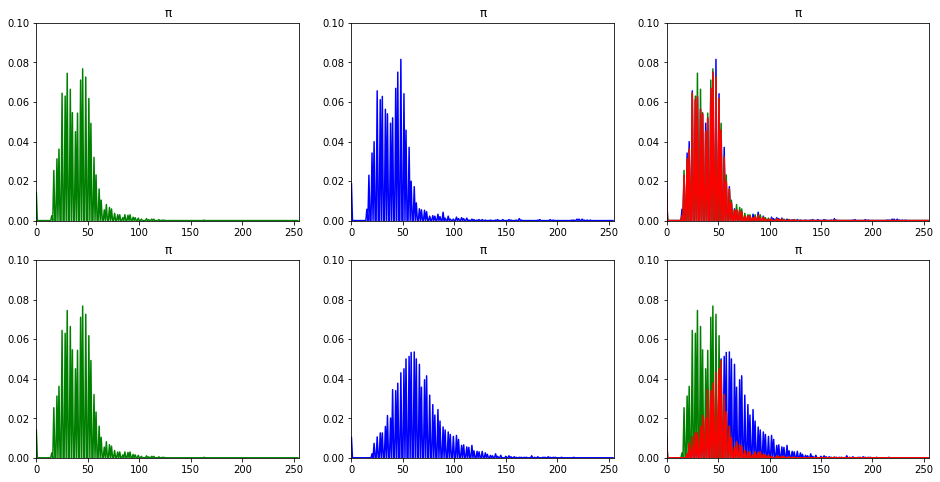

In [54]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))

ax[0,0].set_xlim([0, 255])
ax[0,0].set_ylim([0, 0.1])

ax[1,0].set_xlim([0, 255])
ax[1,0].set_ylim([0, 0.1])


ax[0,1].set_xlim([0, 255])
ax[0,1].set_ylim([0, 0.1])

ax[1,1].set_xlim([0, 255])
ax[1,1].set_ylim([0, 0.1])

ax[0,2].set_xlim([0, 255])
ax[0,2].set_ylim([0, 0.1])

ax[1,2].set_xlim([0, 255])
ax[1,2].set_ylim([0, 0.1])

ax[0, 0].set_title("\u03C0")
ax[0, 0].plot(steadyState_10minutes[0], color = "green") #row=0, col=0
ax[1, 0].set_title("\u03C0")
ax[1, 0].plot(steadyState_10minutes[0], color = "green") #row=0, col=1

ax[0, 1].set_title("\u03C0")
ax[0, 1].plot(steadyState_10minutes[1], color = "blue") #row=1, col=0

ax[1, 1].set_title("\u03C0")
ax[1, 1].plot(steadyState_10minutes[150], color = "blue") #row=1, col=0

ax[0, 2].set_title("\u03C0")
ax[0, 2].plot(steadyState_10minutes[1], color = "blue")
ax[0, 2].plot(steadyState_10minutes[0], color = "green")
extra = np.min((steadyState_10minutes[1], steadyState_10minutes[0]), axis = 0)
ax[0, 2].plot(extra, color = "red")

ax[1, 2].set_title("\u03C0")
ax[1, 2].plot(steadyState_10minutes[150], color = "blue")
ax[1, 2].plot(steadyState_10minutes[0], color = "green")
extra = np.min((steadyState_10minutes[150], steadyState_10minutes[0]), axis = 0)
ax[1, 2].plot(extra, color = "red")

pyplot.savefig("steadyState_comparison.svg", format="svg")
pyplot.savefig("steadyState_comparison.pdf", format="pdf")

plt.show()

In [50]:
np.sum(steadyState_10minutes[150])

0.9999999999999998

In [11]:
i = 0
listOfNeighbours = []
endBoolean = 0
end_index = 0
while i <= correlationScore_numpy.shape[0] and endBoolean == 0:
    listOfNeighbours.append([])
    listOfNeighbours[-1].append(i)
    if i == 0:
        for j in range(correlationScore_numpy.shape[0] - 1, 0, -1):
            if 0.97 < correlationScore_numpy[i][j]:
                listOfNeighbours[-1].append(j)
            else:
                end_index = j + 1
                break
        
            
    for j in range(i + 1, end_index):
        if 0.98 < correlationScore_numpy[i][j]:
            listOfNeighbours[-1].append(j)
        else:
            i = j - 1
            break

        if j == (end_index - 1):
            endBoolean = 1
            break
    i += 1

In [13]:
len(listOfNeighbours)

27

In [47]:
data["indexCorrelation"] = np.inf
warnings.filterwarnings('always')
for neighboursList in listOfNeighbours:
    for j in neighboursList:
        data["indexCorrelation"].loc[(data["timeIndex"] == j)] = listOfNeighbours.index(neighboursList)

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying 

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying 

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying 

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying 

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying 

/home/sepehr/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [53]:
data["indexCorrelation"].loc[data["timeIndex"] == 43]

6820       1.0
6821       1.0
6822       1.0
6823       1.0
6824       1.0
6825       1.0
6826       1.0
6827       1.0
6828       1.0
6829       1.0
6830       1.0
6831       1.0
6832       1.0
6833       1.0
6834       1.0
6835       1.0
6836       1.0
6837       1.0
6838       1.0
6839       1.0
6840       1.0
6841       1.0
6842       1.0
6843       1.0
6844       1.0
6845       1.0
6846       1.0
6847       1.0
6848       1.0
6849       1.0
          ... 
1528561    1.0
1528562    1.0
1528563    1.0
1528564    1.0
1528565    1.0
1528566    1.0
1528567    1.0
1528568    1.0
1528569    1.0
1528570    1.0
1528571    1.0
1528572    1.0
1528573    1.0
1528574    1.0
1528575    1.0
1528576    1.0
1528577    1.0
1528578    1.0
1528579    1.0
1528580    1.0
1528581    1.0
1528582    1.0
1528583    1.0
1528584    1.0
1528585    1.0
1528586    1.0
1528587    1.0
1528588    1.0
1528589    1.0
1528590    1.0
Name: indexCorrelation, Length: 7690, dtype: float64

In [7]:
print(listOfNeighbours)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2]:
len(listOfNeighbours)

NameError: name 'listOfNeighbours' is not defined

In [23]:
data.head()

,col1,time,CU,CU/255,timeIndex,weekDay
0,0,2018-11-12 19:01:32,45,0.176471,114,0
1,1,2018-11-12 19:01:38,45,0.176471,114,0
2,2,2018-11-12 19:01:44,51,0.200000,114,0
3,3,2018-11-12 19:01:50,53,0.207843,114,0
4,4,2018-11-12 19:01:56,45,0.176471,114,0
